<a href="https://colab.research.google.com/github/sdesena/sicar-integration/blob/main/01_CAR_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sicar - Sistema Nacional de Cadastro Ambiental Rural

* Criado pela Lei nº 12.651/2012, no âmbito do Sistema Nacional de Informação sobre Meio Ambiente - SINIMA, e regulamentado pela Instrução Normativa MMA nº 2, de 5 de maio de 2014, o Cadastro Ambiental Rural – CAR é um registro público eletrônico de âmbito nacional, obrigatório para todos os imóveis rurais, com a finalidade de integrar as informações ambientais das propriedades e posses rurais referentes às Áreas de Preservação Permanente - APP, de uso restrito, de Reserva Legal, de remanescentes de florestas e demais formas de vegetação nativa, e das áreas consolidadas, compondo base de dados para controle, monitoramento, planejamento ambiental e econômico e combate ao desmatamento.

* A inscrição no CAR é obrigatória para todos os imóveis rurais do país, constitui-se no primeiro passo para a regularização ambiental e dá acesso a benefícios previstos no Código Florestal (Lei nº 12.651/2012).

Baixar dados em [https://www.car.gov.br/publico/imoveis/index](https://www.car.gov.br/publico/imoveis/index)

Download bases CAR e análises estatísticas


Fonte [SICAR](https://github.com/urbanogilson/SICAR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##instalação das bases
!pip install git+https://github.com/urbanogilson/SICAR -q
!sudo apt install tesseract-ocr -y

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe 

In [ ]:
##Instalação de bases para mapas
!pip install mapclassify -q

In [ ]:
##importando bibliotecas
from SICAR import Sicar,Polygon,State # importar submódulos
from SICAR.drivers import Tesseract # driver usado para reconhece captchas
import pprint # print e visualização dos dados
import geopandas as gpd # manipulação de dados vetoriais
import pandas as pd # manipular dataframes
import matplotlib.pyplot as plt # plotar os mapas
import os # manipular pastas
import zipfile
import folium # gerar mapas interativos
import glob
import zipfile
import shutil
import os


In [ ]:
# Create Sicar instance using Tesseract OCR
car = Sicar(driver=Tesseract)

In [ ]:
help(State)

Help on class State in module SICAR.state:

class State(builtins.str, enum.Enum)
 |  State(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  Enumeration representing states in Brazil.
 |  
 |  Options:
 |      - AC: Acre
 |      - AL: Alagoas
 |      - AM: Amazonas
 |      - AP: Amapá
 |      - BA: Bahia
 |      - CE: Ceará
 |      - DF: Distrito Federal
 |      - ES: Espírito Santo
 |      - GO: Goiás
 |      - MA: Maranhão
 |      - MG: Minas Gerais
 |      - MS: Mato Grosso do Sul
 |      - MT: Mato Grosso
 |      - PA: Pará
 |      - PB: Paraíba
 |      - PE: Pernambuco
 |      - PI: Piauí
 |      - PR: Paraná
 |      - RJ: Rio de Janeiro
 |      - RN: Rio Grande do Norte
 |      - RO: Rondônia
 |      - RR: Roraima
 |      - RS: Rio Grande do Sul
 |      - SC: Santa Catarina
 |      - SE: Sergipe
 |      - SP: São Paulo
 |      - TO: Tocantins
 |  
 |  Method resolution order:
 |      State
 |      builtins.str
 |      enum.Enum
 |      builtins.object

In [ ]:
help(Polygon)

Help on class Polygon in module SICAR.polygon:

class Polygon(builtins.str, enum.Enum)
 |  Polygon(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  Enumeration representing Sicar polygons.
 |  
 |  Options:
 |      - AREA_PROPERTY: Perímetros dos imóveis (Property perimeters)
 |      - APPS: Área de Preservação Permanente (Permanent preservation area)
 |      - NATIVE_VEGETATION: Remanescente de Vegetação Nativa (Native Vegetation Remnants)
 |      - CONSOLIDATED_AREA: Área Consolidada (Consolidated Area)
 |      - AREA_FALL: Área de Pousio (Fallow Area)
 |      - HYDROGRAPHY: Hidrografia (Hydrography)
 |      - RESTRICTED_USE: Uso Restrito (Restricted Use)
 |      - ADMINISTRATIVE_SERVICE: Servidão Administrativa (Administrative Servitude)
 |      - LEGAL_RESERVE: Reserva Legal (Legal reserve)
 |  
 |  Method resolution order:
 |      Polygon
 |      builtins.str
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |

In [ ]:
help(Sicar)

Help on class Sicar in module SICAR.sicar:

class Sicar(SICAR.url.Url)
 |  Sicar(driver: SICAR.drivers.captcha.Captcha = <class 'SICAR.drivers.tesseract.Tesseract'>, headers: Dict = None)
 |  
 |  Class representing the Sicar system.
 |  
 |  Sicar is a system for managing environmental rural properties in Brazil.
 |  
 |  It inherits from the Url class to provide access to URLs related to the Sicar system.
 |  
 |  Attributes:
 |      _driver (Captcha): The driver used for handling captchas. Default is Tesseract.
 |  
 |  Method resolution order:
 |      Sicar
 |      SICAR.url.Url
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, driver: SICAR.drivers.captcha.Captcha = <class 'SICAR.drivers.tesseract.Tesseract'>, headers: Dict = None)
 |      Initialize an instance of the Sicar class.
 |      
 |      Parameters:
 |          driver (Captcha): The driver used for handling captchas. Default is Tesseract.
 |          headers (Dict): Additional headers for HT

## Download por Estado

o contexto é parecido, contudo, aqui, nós vamos baixar as bases por Estado, extrair dos zips, e depois unir em um único arquivo.

Vamos lá?

In [ ]:
# Faça o download das classes do polígonos dentro do car por estado
car.download_state(State.SP, Polygon.LEGAL_RESERVE, folder='drive/MyDrive/SICAR')

# car.download_state(State.SP, Polygon.APPS, folder='drive/MyDrive/SICAR')

car.download_state(State.SP, Polygon.AREA_PROPERTY, folder='drive/MyDrive/SICAR')

# car.download_state(State.SP, Polygon.NATIVE_VEGETATION, folder='drive/MyDrive/SICAR')


PosixPath('drive/MyDrive/SICAR/SP/SP_AREA_IMOVEL.zip')

In [ ]:
# Verifique os arquivos contidos no repositório
caminho_repositorio = "/content/drive/MyDrive/SICAR/*.zip"  # Substitua pelo caminho do seu repositório

arquivos_zip = glob.glob(caminho_repositorio)
arquivos_zip

['/content/drive/MyDrive/SICAR/SP_RESERVA_LEGAL.zip',
 '/content/drive/MyDrive/SICAR/SP_AREA_IMOVEL.zip']

In [ ]:
##Extrair os arquivos zip e salvar com o código do município
for arquivo_zip in arquivos_zip:
    nome_arquivo_zip = os.path.basename(arquivo_zip)
    nome_arquivo_extraido = nome_arquivo_zip.split(".")[0]  # Extrai a parte desejada do nome do arquivo ZIP

    try:
        with zipfile.ZipFile(arquivo_zip, 'r') as zip_ref:
            zip_ref.extractall("/content/drive/MyDrive/SICAR/shapefiles/" + nome_arquivo_extraido)  # Substitua pelo caminho do diretório de destino para a extração
    except zipfile.BadZipFile:
        print(f"O arquivo {arquivo_zip} não é um arquivo ZIP válido. Ignorando...")

In [ ]:
# Acessando bases que foram baixadas
repositorio = "/content/drive/MyDrive/SICAR/shapefiles/*"  # Substitua pelo caminho do seu repositório
pastas = glob.glob(repositorio)
pastas

['/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL',
 '/content/drive/MyDrive/SICAR/shapefiles/SP_AREA_IMOVEL']

In [ ]:
# Vamos localizar os registros de reserva legal com status pendente pa
caminho_pasta = '/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL'
dados_shp = gpd.read_file(caminho_pasta)
cars_status = dados_shp.loc[dados_shp['ind_status'] == 'PE']
cars_status

,cod_tema,nom_tema,cod_imovel,num_area,ind_status,des_condic,geometry
451,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500709-E90A4143B7564F748A1CC03E7E90C553,4.9022,PE,Aguardando analise,"MULTIPOLYGON (((-49.36990 -22.73287, -49.36943..."
2131,ARL_PROPOSTA,Reserva Legal Proposta,SP-3501004-DDF39A0540C546A8A59D308FBF6935A4,15.2162,PE,Aguardando analise,"MULTIPOLYGON (((-47.53408 -21.19439, -47.53324..."
2181,ARL_PROPOSTA,Reserva Legal Proposta,SP-3501004-DF28D6F0F871489DB1C9FA6735333A62,0.6210,PE,"Analisado, aguardando atendimento a notificacao","POLYGON ((-47.58826 -21.17435, -47.58828 -21.1..."
2842,ARL_PROPOSTA,Reserva Legal Proposta,SP-3501004-A4CD0C11230F44A697160A79E03F339A,0.0212,PE,"Analisado, aguardando atendimento a notificacao","POLYGON ((-47.58609 -21.17338, -47.58608 -21.1..."
3078,ARL_PROPOSTA,Reserva Legal Proposta,SP-3501004-6D26E0FBB745477EB7E086600419505A,0.0265,PE,"Analisado, aguardando atendimento a notificacao","POLYGON ((-47.58558 -21.17309, -47.58562 -21.1..."
...,...,...,...,...,...,...,...
364691,ARL_PROPOSTA,Reserva Legal Proposta,SP-3552502-2E5F7504AF7346B2B9A19AFA6E2F8107,5.1131,PE,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.28950 -23.65449, -46.29023..."
369670,ARL_PROPOSTA,Reserva Legal Proposta,SP-3553658-564C2799443D404B8EA1E8B86B2CBEF0,0.7762,PE,Em analise,"POLYGON ((-48.45284 -21.05139, -48.45274 -21.0..."
370371,ARL_PROPOSTA,Reserva Legal Proposta,SP-3554508-FAC7250B02F3423D87D35BB82D03A9D4,13.5311,PE,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-47.73618 -22.93641, -47.73629..."
374771,ARL_PROPOSTA,Reserva Legal Proposta,SP-3556008-032A867BDD734768BE06E57FC13C7D3F,0.9451,PE,Aguardando analise,"POLYGON ((-49.17790 -21.19585, -49.17770 -21.1..."


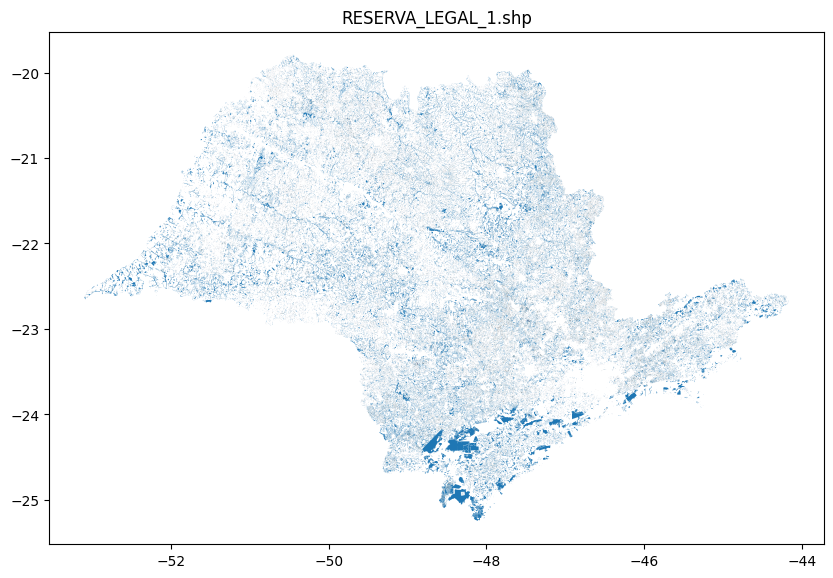

In [ ]:
# Define o caminho da pasta contendo os arquivos shp
caminho_pasta = '/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL'

# Lista os arquivos shp na pasta
arquivos_shp = [arquivo for arquivo in os.listdir(caminho_pasta) if arquivo.endswith('.shp')]

# Percorre cada arquivo shp e plota separadamente
for arquivo_shp in arquivos_shp:
    # Lê o arquivo shp com o Geopandas
    caminho_arquivo = os.path.join(caminho_pasta, arquivo_shp)
    dados_shp = gpd.read_file(caminho_arquivo)

    # Cria uma nova figura
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plota os dados
    ax.set_title(arquivo_shp)
    dados_shp.plot(ax=ax)

    # Exibe o gráfico
    plt.show()

In [ ]:
# Visualize os cincos primeiros registros
dados_shp.head()

,cod_tema,nom_tema,cod_imovel,num_area,ind_status,des_condic,geometry
0,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-A79BCD74BF1444239F4AF6A7D5E00568,0.9145,AT,Aguardando analise,"MULTIPOLYGON (((-46.70191 -21.84815, -46.70190..."
1,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-572AE6F74E72497A9D2A3351BD7B6CDE,6.7116,AT,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.71701 -21.84113, -46.71638..."
2,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-EE5A8D1E342C401C896AC8F07AB4B7CB,2.5834,AT,"Aguardando analise, apos revisao ou atendiment...","MULTIPOLYGON (((-46.70915 -21.87148, -46.70944..."
3,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-8E4D12ABCECC4DF3B4C7367CF9F233A4,3.2371,AT,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.70907 -21.86099, -46.70955..."
4,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-0A03E853F57046E0B172302C69128786,2.2053,AT,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.71904 -21.88057, -46.71955..."


In [ ]:
dados_shp.value_counts('ind_status')

ind_status
AT    366138
CA     12126
PE       476
Name: count, dtype: int64

In [ ]:
# Nomes das colunas
dados_shp.columns

Index(['cod_tema', 'nom_tema', 'cod_imovel', 'num_area', 'ind_status',
       'des_condic', 'geometry'],
      dtype='object')

In [ ]:
# Estrutura, dimensão e tipos dos dados
dados_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 378740 entries, 0 to 378739
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   cod_tema    378740 non-null  object  
 1   nom_tema    378740 non-null  object  
 2   cod_imovel  378740 non-null  object  
 3   num_area    378740 non-null  float64 
 4   ind_status  378740 non-null  object  
 5   des_condic  378740 non-null  object  
 6   geometry    378740 non-null  geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 20.2+ MB


In [ ]:
# Sistema de referência de coordenadas
dados_shp.crs

<Bound CRS: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_ ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from SIRGAS 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: SIRGAS 2000

In [ ]:
# Contagem de ID únicos
cod_imovel = dados_shp['cod_imovel'].nunique()
cod_imovel

205633

In [ ]:
# Estatísticas descritivas da área em hectares do tema selecionado (nesse caso, reserva legal)
num_area = dados_shp['num_area']
num_area.describe()

count    378740.000000
mean         10.745156
std         531.776767
min           0.000000
25%           0.360300
50%           1.246000
75%           4.303050
max      200268.906200
Name: num_area, dtype: float64

In [ ]:
# ##Juntando os SHP
# ##Caso esteja trabalhando com mais de uma estado... estas linhas vão unir os dados de app dos estados

# # Define o caminho da pasta contendo os arquivos shp
# caminho_pasta = '/content/drive/MyDrive/SICAR/'

# # Lista os arquivos shp na pasta
# arquivos_shp = [os.path.join(caminho_pasta, arquivo) for arquivo in os.listdir(caminho_pasta) if arquivo.endswith('.shp')]

# # Realiza o join dos arquivos Shapefile
# gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in arquivos_shp], ignore_index=True),
#                        crs=gpd.read_file(arquivos_shp[0]).crs)

# # Define o caminho do arquivo de saída
# caminho_saida = '/content/drive/MyDrive/SICAR/RESERVA_LEGAL_join'

# # Salva o GeoDataFrame concatenado como um arquivo Shapefile
# gdf.to_file(caminho_saida, driver='ESRI Shapefile')

# # Analisando resultado
# RESERVA_LEGAL_join = gpd.read_file('/content/drive/MyDrive/SICAR/RESERVA_LEGAL_join.shp')
# RESERVA_LEGAL_join

In [ ]:
# # Criar um plot do GeoDataFrame com cores baseadas na coluna des_condic
# fig, ax = plt.subplots(figsize=(12, 8))
# dados_shp.plot(column='des_condic', cmap='viridis', ax=ax, legend=False)

# # Definir título e rótulo do eixo x
# ax.set_title('Condição em que o cadastro se encontra no fluxo de análise pelo órgão competente.')
# ax.set_xlabel('Longitude')

# # Mostrar o plot
# plt.show()

In [ ]:
from folium.plugins import MarkerCluster

# Carregar dados shapefile
cars_status

# Simplificar geometria para reduzir o consumo de memória
cars_status['geometry'] = cars_status['geometry'].simplify(tolerance=0.001)

# Preenchendo centróide com lat e long
centroids = cars_status.geometry.centroid

# Calcula a média das coordenadas x e y dos centróides
mean_x = centroids.x.mean()
mean_y = centroids.y.mean()

# Cria um mapa base
m = folium.Map(location=[mean_y, mean_x], zoom_start=13)

# Adicionando GeoDataFrame ao mapa usando folium.GeoJson
geojson = folium.GeoJson(
    cars_status,
    name="ind_status",
    style_function=lambda feature: {
        'fillColor': 'blue',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    },
    tooltip=folium.GeoJsonTooltip(fields=['ind_status'], aliases=['Status'])
).add_to(m)

# Adiciona uma camada de satélite do Google
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=False,
    control=True
).add_to(m)

# Adiciona o controle de camadas
folium.LayerControl().add_to(m)

# Exibir o mapa
m


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-10-c1f1b710fb6e>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = cars_ativos.geometry.centroid


In [ ]:
m.save('test.html')